At UC Merced, undergraduate students must complete classes affiliated with a set of 11 Intellectual badges along with their general education requirements in order to graduate. The classes associated with these 11 badges are spread across 11 different websites and the classes associated with the general education requirements are also located at yet other websites. This makes it a non-trivial task for student counselors to keep track of and best advise their students.
&nbsp;  

In this project, I will retrieve general education courses from UC Merced's Social Sciences and Arts & Humanities website and compile them into a spreadsheet. I will also scrape links to the 11 different badge websites and retrieve their respective courses from these links and compile them into a spreadsheet.
&nbsp;  

Additionally, I will also create spreadsheets that will cross-reference the general education courses that overlap with the courses associated with the Intellectual badges.

The code found in this Jupyter Notebook creates pandas dataframes for the items listed above and it added merely to act as a tutorial. The file scrape.py contains the complete source code to create an Excel workbook with multiple worksheets.

In this project, the requests library will be used to scrape websites while BeautifulSoup does the parsing.

In [75]:
import requests
from bs4 import BeautifulSoup

from pprint import pprint
import re
import pandas as pd

The variable ucm_url contains the string for the UC Merced website containing a list of GE courses for the Social Sciences and Arts & Humanities fields of study.
&nbsp;  

The variable ucm_badges contains the string for the UC Merced website containing links to all 11 Intellectual Badges. These links can be followed and the course listed on them scraped.

In [76]:
ucm_url = 'https://catalog.ucmerced.edu/preview_program.php?catoid=17&poid=2135'

# The main webpage for badges
ucm_badges = 'https://ge.ucmerced.edu/intellectual-experience-badges'

We will first focus on the general education requirement courses for the Social Sciences and Arts & Humanities fields of study.
&nbsp;  

Scrape the URL. Check whether website is json or html formatted.

In [77]:
ges = requests.get(ucm_url)
ges.headers.get('content-type')    # not a json file

'text/html; charset=UTF-8'

The website is HTML formatted. The HTML was not easy to read despite using pretty print.

In [78]:
pprint(ges.content)

(b'<!DOCTYPE html><html lang="en">\n\t<head>\n\t\t<title>Program: AREA B: So'
 b'cial Science, Arts and Humanities - University of California Merced - Acalog'
 b' ACMS\xe2\x84\xa2</title>\n\t\t\t\t<meta http-equiv="Content-Type" content'
 b'="text/html; charset=UTF-8">\n\t\t\t\t<link rel="shortcut icon" href="//a'
 b'calog-clients.s3.amazonaws.com/production/ucmerced/img/favicon/favicon.ico" '
 b'/>\n\t\t\t<link href="//acalog-clients.s3.amazonaws.com/production/ucmerced/'
 b'css/gateway/user-styles.css" rel="stylesheet" type="text/css">\n\t\t<link h'
 b'ref="css/public_custom.php" rel="stylesheet" type="text/css">\n\t\t<link hr'
 b'ef="global_styles.css" rel="stylesheet" type="text/css">\n\t\t\t<!--[if IE]>'
 b'\n\t\t<link rel="stylesheet" type="text/css" href="ie.css" />\n\t\t<![endi'
 b'f]-->\n\n\t\t\t<!-- Cache-busting string (deploy date) added to asset URL'
 b'S -->\n\t\t<script src="js/jquery.js?v=01252018" type="text/javascript"></s'
 b'cript>\n\t\t<script src="js/Tooltip.js?v=

 b'anded="false" onClick="showCourse(\'17\', \'43115\',this, \'a:2:{s:8:~loc'
 b'ation~;s:7:~program~;s:4:~core~;s:5:~11629~;}\'); return false;">GASP 144'
 b'A: Art for Social Change</a> Units: 4</span></li><li class="acalog-course"><'
 b'span><a href="#" aria-expanded="false" onClick="showCourse(\'17\', \'43186\''
 b",this, 'a:2:{s:8:~location~;s:7:~program~;s:4:~core~;s:5:~11629~;}'); return"
 b' false;">GASP 156A: Visual Arts of the 20th Century</a> Units: 4</span></li>'
 b'<li class="acalog-course"><span><a href="#" aria-expanded="false" onClick="s'
 b"howCourse('17', '43342',this, 'a:2:{s:8:~location~;s:7:~program~;s:4:~core~;"
 b's:5:~11629~;}\'); return false;">GASP 156B: South Asia After Europe: Visu'
 b'al Cultures of Colonialism &amp; Post-colonialism</a> Units: 4</span></li><l'
 b'i class="acalog-course"><span><a href="#" aria-expanded="false" onClick="sho'
 b"wCourse('17', '43190',this, 'a:2:{s:8:~location~;s:7:~program~;s:4:~core~;s:"
 b'5:~11629~;}\'); return false;">GAS

I found it easier to inspect the scraped HTML content by creating a Beautiful Soup object and parsing it with an HTML parser. I inspected this output and compared it to the web page viewed using Firefox's web developer tools as a sanity check.
&nbsp;

I was interested in locating all of the GE classes in the Social Sciences and Arts & Humanities. At some point, I'd like to expand on this project to include all areas of study offered by the college.
&nbsp;

Zooming in on the courses show that "Social Science Courses" is a second level header. Right below it is a list of social sciences general education courses. The "Arts and Humanties Courses" are organized in the same manner.

&ensp;  

<div>
    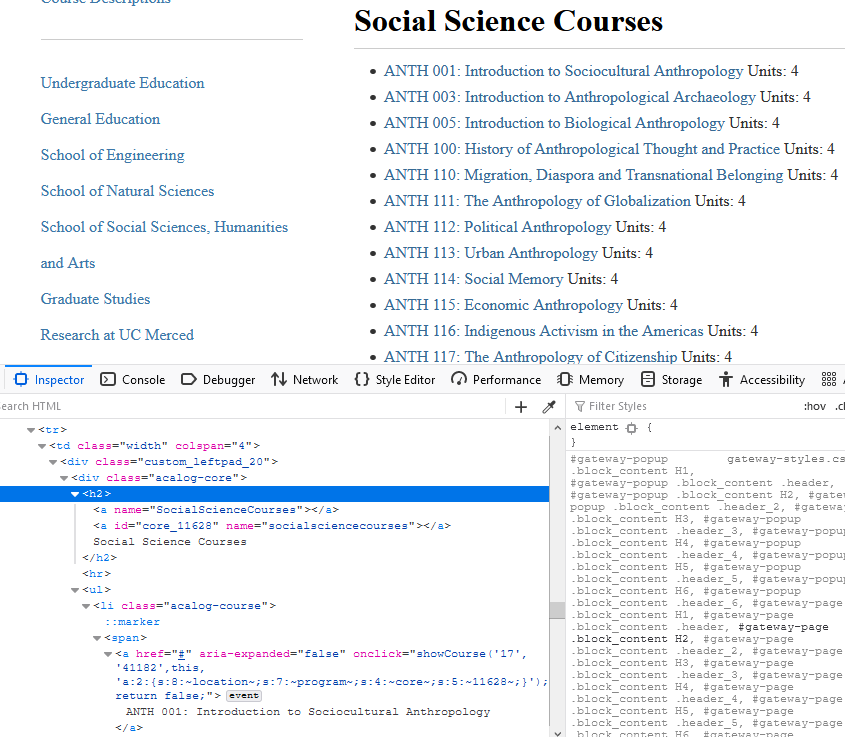
</div>
        


In [79]:
ge_soup = BeautifulSoup(ges.content, features = 'html.parser')
ge_soup

<!DOCTYPE html>
<html lang="en">
<head>
<title>Program: AREA B: Social Science, Arts and Humanities - University of California Merced - Acalog ACMS™</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="//acalog-clients.s3.amazonaws.com/production/ucmerced/img/favicon/favicon.ico" rel="shortcut icon"/>
<link href="//acalog-clients.s3.amazonaws.com/production/ucmerced/css/gateway/user-styles.css" rel="stylesheet" type="text/css"/>
<link href="css/public_custom.php" rel="stylesheet" type="text/css"/>
<link href="global_styles.css" rel="stylesheet" type="text/css"/>
<!--[if IE]>
		<link rel="stylesheet" type="text/css" href="ie.css" />
		<![endif]-->
<!-- Cache-busting string (deploy date) added to asset URLS -->
<script src="js/jquery.js?v=01252018" type="text/javascript"></script>
<script src="js/Tooltip.js?v=01252018" type="text/javascript"></script>
<script src="javascripts.js?v=02232018" type="text/javascript"></script>
<script src="js/smlinks.js?v=

Extract the Social Sciences and Arts & Humanities Courses headers. These headers will be used as keys in a dictionary of their respective classes. This dictionary will be converted to a pandas dataframe.

In [80]:
ge_names = ge_soup.find_all("div", "acalog-core")
ge_headers = [[x.text for x in ele][0] for ele in ge_names[:-1]]
ge_headers

['Social Science Courses', 'Arts and Humanities Courses']

The Social Sciences and Arts & Humanities courses fulfilling general education requirements classes is extracted using BeautifulSoup's .find_all() filtering for the a tag and href = '#' attribute.

In [81]:
ge_classes = ge_soup.find_all("a", href = "#")
ge_classes

[<a aria-expanded="false" href="#" onclick="showCourse('17', '41182',this, 'a:2:{s:8:~location~;s:7:~program~;s:4:~core~;s:5:~11628~;}'); return false;">ANTH 001: Introduction to Sociocultural Anthropology</a>,
 <a aria-expanded="false" href="#" onclick="showCourse('17', '41183',this, 'a:2:{s:8:~location~;s:7:~program~;s:4:~core~;s:5:~11628~;}'); return false;">ANTH 003: Introduction to Anthropological Archaeology</a>,
 <a aria-expanded="false" href="#" onclick="showCourse('17', '41184',this, 'a:2:{s:8:~location~;s:7:~program~;s:4:~core~;s:5:~11628~;}'); return false;">ANTH 005: Introduction to Biological Anthropology</a>,
 <a aria-expanded="false" href="#" onclick="showCourse('17', '41189',this, 'a:2:{s:8:~location~;s:7:~program~;s:4:~core~;s:5:~11628~;}'); return false;">ANTH 100: History of Anthropological Thought and Practice</a>,
 <a aria-expanded="false" href="#" onclick="showCourse('17', '41190',this, 'a:2:{s:8:~location~;s:7:~program~;s:4:~core~;s:5:~11628~;}'); return false;">

Retrieve the visible content (text portion) of the hyperlink tag since that is where the class information is located.

In [82]:
ges = [x.text for x in ge_classes]
ges

['ANTH 001: Introduction to Sociocultural Anthropology',
 'ANTH 003: Introduction to Anthropological Archaeology',
 'ANTH 005: Introduction to Biological Anthropology',
 'ANTH 100: History of Anthropological Thought and Practice',
 'ANTH 110: Migration, Diaspora and Transnational Belonging',
 'ANTH 111: The Anthropology of Globalization',
 'ANTH 112: Political Anthropology',
 'ANTH 113: Urban Anthropology',
 'ANTH 114: Social Memory',
 'ANTH 115: Economic Anthropology',
 'ANTH 116: Indigenous Activism in the Americas',
 'ANTH 117: The Anthropology of Citizenship',
 'ANTH 120: Introduction to Medical Anthropology',
 'ANTH 121: Ethnomedicine',
 'ANTH 122: Anthropological Perspectives on Religion and Healing',
 'ANTH 124: Ethnopsychology',
 'ANTH 126: Anthropological Approaches to Gender',
 'ANTH 130: Material Culture',
 'ANTH 134: Dynamics of Small-scale Societies',
 'ANTH 140: Cultural Heritage Policy and Practice',
 'ANTH 141: Writing Narrative for Archaeology',
 'ANTH 142: Archaeology

This returns a single list of all of the GE classes associated with both areas of study, the Social Sciences and Arts & Humanities. All courses are listed in alphabetical order according to course name where Social Science courses are listed first followed by Arts & Humanities course. 

Before we separate these classes according to area of study, notice how some courses are listed with superfluous characters such as:

 - "CCST 060: Introduction to Chicano/a Culture and Experiences"
 - "SPAN 113: U.S. Latino/a Literature"
 
Let's clean this up by replacing these superfluous "/a", "/as" characters with an empty string, "".

In [83]:
for idx, ele in enumerate(ges):
    if ("/as" in ele) or ("/a" in ele):
        ges[idx] = ele.replace("/as", "").replace("/a", "")
        
ges

['ANTH 001: Introduction to Sociocultural Anthropology',
 'ANTH 003: Introduction to Anthropological Archaeology',
 'ANTH 005: Introduction to Biological Anthropology',
 'ANTH 100: History of Anthropological Thought and Practice',
 'ANTH 110: Migration, Diaspora and Transnational Belonging',
 'ANTH 111: The Anthropology of Globalization',
 'ANTH 112: Political Anthropology',
 'ANTH 113: Urban Anthropology',
 'ANTH 114: Social Memory',
 'ANTH 115: Economic Anthropology',
 'ANTH 116: Indigenous Activism in the Americas',
 'ANTH 117: The Anthropology of Citizenship',
 'ANTH 120: Introduction to Medical Anthropology',
 'ANTH 121: Ethnomedicine',
 'ANTH 122: Anthropological Perspectives on Religion and Healing',
 'ANTH 124: Ethnopsychology',
 'ANTH 126: Anthropological Approaches to Gender',
 'ANTH 130: Material Culture',
 'ANTH 134: Dynamics of Small-scale Societies',
 'ANTH 140: Cultural Heritage Policy and Practice',
 'ANTH 141: Writing Narrative for Archaeology',
 'ANTH 142: Archaeology

Now that the course names are stripped of these characters, we can turn our attention to differentiating between classes associated with the Social Sciences and the Arts and Humanities. We're interested in separating the classes according to area of study so that we can create a dictionary where areas of study are keys and their respective courses are classes. The dictionary can be converted to a pandas dataframe.
&nbsp;  

The last course listed for Social Sciences is a writing course with the course name beginning with the letter "W". The first course listed for Arts & Humanities is an anthropology course with the course name beginning with the letter "A". By locating the index (*idx - 1*) where the first letter of the course name is greater than the first letter of the next course name (*idx*), we can differentiate between classes in the Social Sciences versus that of Arts & Humanities.

In [84]:
# Sanity check

for idx in range(1, len(ges)):
    if ges[idx-1][0] > ges[idx][0]:
        split_at = idx
        print(split_at, ges[idx-1], ges[idx])

227 WRI 141: Writing Narrative for Archaeology ANTH 110: Migration, Diaspora and Transnational Belonging


Now, we can split the classes according to their areas of study and use the GE headers we obtained from above to create a dictionary of Social Science and Arts & Humanties courses.

In [85]:
ge_classes = [ges[:split_at], ges[split_at:]]
ge_dict = dict(zip(ge_headers, ge_classes))
ge_dict

{'Social Science Courses': ['ANTH 001: Introduction to Sociocultural Anthropology',
  'ANTH 003: Introduction to Anthropological Archaeology',
  'ANTH 005: Introduction to Biological Anthropology',
  'ANTH 100: History of Anthropological Thought and Practice',
  'ANTH 110: Migration, Diaspora and Transnational Belonging',
  'ANTH 111: The Anthropology of Globalization',
  'ANTH 112: Political Anthropology',
  'ANTH 113: Urban Anthropology',
  'ANTH 114: Social Memory',
  'ANTH 115: Economic Anthropology',
  'ANTH 116: Indigenous Activism in the Americas',
  'ANTH 117: The Anthropology of Citizenship',
  'ANTH 120: Introduction to Medical Anthropology',
  'ANTH 121: Ethnomedicine',
  'ANTH 122: Anthropological Perspectives on Religion and Healing',
  'ANTH 124: Ethnopsychology',
  'ANTH 126: Anthropological Approaches to Gender',
  'ANTH 130: Material Culture',
  'ANTH 134: Dynamics of Small-scale Societies',
  'ANTH 140: Cultural Heritage Policy and Practice',
  'ANTH 141: Writing Narr

We can then use pandas' .from_dict() function to convert the dictionary to a pandas DataFrame. Incorporate dictionary comprehension to take into account the columns with different lengths.

In [86]:
ge_df = pd.DataFrame.from_dict({key: pd.Series(value) for key, value in ge_dict.items()})
ge_df

,Social Science Courses,Arts and Humanities Courses
0,ANTH 001: Introduction to Sociocultural Anthro...,"ANTH 110: Migration, Diaspora and Transnationa..."
1,ANTH 003: Introduction to Anthropological Arch...,ANTH 111: The Anthropology of Globalization
2,ANTH 005: Introduction to Biological Anthropology,ANTH 112: Political Anthropology
3,ANTH 100: History of Anthropological Thought a...,ANTH 113: Urban Anthropology
4,"ANTH 110: Migration, Diaspora and Transnationa...",ANTH 114: Social Memory
...,...,...
333,NaN,WRI 130: Topics in Professional Writing
334,NaN,WRI 131A: Journal Production: Technical Writin...
335,NaN,WRI 131B: Journal Production: Vernal Pool
336,NaN,WRI 141: Writing Narrative for Archaeology


Now that the general education courses for the Social Sciences and Arts & Humanities are taken care of, let's focus our attention on retrieving the links for the 11 Intellectual Badges. Once we've retrieved the links, then we can go to those links to scrape for course information.
&nbsp;

Recall, the main webpage for badges is
ucm_badges = 'https://ge.ucmerced.edu/intellectual-experience-badges'

In [87]:
badge_links = []

badges = requests.get(ucm_badges)
bsoup = BeautifulSoup(badges.content, features = "html.parser")
bsoup

<!DOCTYPE html>

<!--[if lt IE 7]> <html class="ie6 ie" lang="en" dir="ltr"> <![endif]-->
<!--[if IE 7]>    <html class="ie7 ie" lang="en" dir="ltr"> <![endif]-->
<!--[if IE 8]>    <html class="ie8 ie" lang="en" dir="ltr"> <![endif]-->
<!--[if IE 9]>    <html class="ie9 ie" lang="en" dir="ltr"> <![endif]-->
<!--[if !IE]> --> <html dir="ltr" lang="en"> <!-- <![endif]-->
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-5TX46XW');</script>
<!-- End Google Tag Manager -->
<link as="font" crossorigin="" href="/sites/all/themes/UCMerced/package/font-awesome-4.6.1/fonts/fontawesome-webfont.woff2?v=4.6.1" rel="preload" type="font/woff2"/>
<meta content="text/html; charset=ut

Inspecting the soup contents shows the badges links are listed in the a tag with the attribute href beginning with  'https://ge.ucmerced.edu/intellectual-experience-badges'. We can scrape for the badges links using that information.

In [88]:
for item in bsoup.find_all('a'):
    if 'https://ge.ucmerced.edu/intellectual-experience-badges' in item.get('href'):
        badge_links.append(item.get('href'))

badge_links

['https://ge.ucmerced.edu/intellectual-experience-badges/media-and-visual-analysis',
 'https://ge.ucmerced.edu/intellectual-experience-badges/scientific-method',
 'https://ge.ucmerced.edu/intellectual-experience-badges/literary-and-textual-analysis',
 'https://ge.ucmerced.edu/intellectual-experience-badges/quantitative-and-numerical-analysis',
 'https://ge.ucmerced.edu/intellectual-experience-badges/societies-and-cultures-past',
 'https://ge.ucmerced.edu/intellectual-experience-badges/diversity-and-identity',
 'https://ge.ucmerced.edu/intellectual-experience-badges/global-awareness',
 'https://ge.ucmerced.edu/intellectual-experience-badges/sustainability',
 'https://ge.ucmerced.edu/intellectual-experience-badges/practical-and-applied-knowledge',
 'https://ge.ucmerced.edu/intellectual-experience-badges/ethics',
 'https://ge.ucmerced.edu/intellectual-experience-badges/leadership-community-and-engaging-world']

Now that we have the web links for the 11 badges, we can scrape those sites to retrieve course information.

In [91]:
badge_contents = []

for link in badge_links:
    courses = requests.get(link)
    link_soup = BeautifulSoup(courses.content, features='html.parser')
    badge_contents.append(link_soup)
    
print(len(badge_contents))    # Expect to see 11 items for the 11 sites.
badge_contents

11


[<!DOCTYPE html>
 
 <!--[if lt IE 7]> <html class="ie6 ie" lang="en" dir="ltr"> <![endif]-->
 <!--[if IE 7]>    <html class="ie7 ie" lang="en" dir="ltr"> <![endif]-->
 <!--[if IE 8]>    <html class="ie8 ie" lang="en" dir="ltr"> <![endif]-->
 <!--[if IE 9]>    <html class="ie9 ie" lang="en" dir="ltr"> <![endif]-->
 <!--[if !IE]> --> <html dir="ltr" lang="en"> <!-- <![endif]-->
 <head>
 <!-- Google Tag Manager -->
 <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
 new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
 j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
 'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
 })(window,document,'script','dataLayer','GTM-5TX46XW');</script>
 <!-- End Google Tag Manager -->
 <link as="font" crossorigin="" href="/sites/all/themes/UCMerced/package/font-awesome-4.6.1/fonts/fontawesome-webfont.woff2?v=4.6.1" rel="preload" type="font/woff2"/>
 <meta content="text

Inspecting the contents of each site show that courses are located in the div tag with the same id="content-col2-1". We can strip the course names from each badge type by searching for the colon character, ':', since all course names are preceded by the course subject, number and colon.
&nbsp;

These classes also contain the same superfluous characters described above for the ge courses along with additional ones such as an extra tab in the name or:

 - 'MIST 132: Geographic Informational Systems Analysis in Management\xa0'
 - 'PHYS 004: Introductory Astronomy: Stars, Galaxies and the Universe\xa0'

In [92]:
badge_courses = []

for badge in badge_contents:
    contents = badge.find('div', id='content-col2-1')
    
    stripped_contents = []
    for course in contents.text.split('\n'):
        if ":" in course:
            stripped_contents.append(course)
    
    for idx, ele in enumerate(stripped_contents):
        if ("\xa0" in ele) or ("/as" in ele) or ("/a" in ele) or ("\t" in ele):
            stripped_contents[idx] = ele.replace("\xa0", "").replace("/as", "").replace("/a", "").replace("\t", "")   
    badge_courses.append(stripped_contents)
    
badge_courses

[['ANTH 144: Archaeology of Religion',
  'ANTH 148: Topics in Complex Societies',
  'BIOE 113: Bioinstrumentation',
  'CCST 060: Introduction to Chicano Culture and Experiences',
  'COGS 013: Scientific Thinking',
  'COGS 101: Mind, Brain, and Computation',
  'COGS 110: Philosophy of Cognitive Science',
  'COGS 140: Perception and Action',
  'COGS 159: Metaphor and Thought',
  'CRES 001: Introduction to Critical Race and Ethnic Studies',
  'CRES 020: Introduction to Asian American Studies',
  'CRES 052: Power in Films',
  'CRES 072B: Elements and Cultures of Hip Hop',
  'CRES 076A: Social Dance, Social Bodies',
  'CRES 076A: Social Dance, Social Bodies',
  'CRES 101: Race and the Media',
  'CRES 121: Critical Refugee Studies',
  'CRES 122: Comparative Immigrations',
  'CRES 123: Comparative Race and Ethnicity in the United States',
  'ECON 108: Marketing and Consumer Behavior',
  'ECON 112: GIS for World Economic History',
  'ENG 012: Introduction to Theatre and Performance',
  'ENG 03

Now that we have the courses for each of the 11 Intellectual Badges, let's create a dictinary of badges so we can convert it into a pandas dataframe. This requires that we zip the headers and classes into a dictionary.
&nbsp;  

All badge titles are level 1 headers and are in the attribute class = "title". Since class is a reserved word, we would need to use class_. All badge titles begin with 'Badge :'. We will be omitting this.

In [93]:
badge_headers = []

for badge in badge_contents:
    badge_headers.append(badge.find('h1', class_='title'))
    
badge_titles = [title.text.strip()[7:] for title in badge_headers]
badges_dict = dict(zip(badge_titles, badge_courses))
badges_df = pd.DataFrame.from_dict({key: pd.Series(value) for key, value in badges_dict.items()})
badges_df

,Media and Visual Analysis,Scientific Method,Literary and Textual Analysis,Quantitative and Numerical Analysis,Societies and Cultures of the Past,Diversity and Identity,Global Awareness,Sustainability,Practical and Applied Knowledge,Ethics,"Leadership, Community, and Engaging the World"
0,ANTH 144: Archaeology of Religion,ANTH 003: Introduction to Anthropological Arch...,ANTH 111: The Anthropology of Globalization,ANTH 171: Human Population Studies: Data and M...,ANTH 003: Introduction to Anthropological Arch...,ANTH 001: Introduction to Sociocultural Anthro...,ANTH 001: Introduction to Sociocultural Anthro...,ANTH 005: Introduction to Biological Anthropology,ANTH 100: History of Anthropological Thought a...,ANTH 001: Introduction to Sociocultural Anthro...,ANTH 111: The Anthropology of Globalization
1,ANTH 148: Topics in Complex Societies,ANTH 005: Introduction to Biological Anthropology,ANTH 113: Urban Anthropology,BIO 001: Contemporary Biology,ANTH 005: Introduction to Biological Anthropology,ANTH 003: Introduction to Anthropological Arch...,ANTH 003: Introduction to Anthropological Arch...,ANTH 144: Archaeology of Religion,ANTH 120: Introduction to Medical Anthropology,ANTH 003: Introduction to Anthropological Arch...,ANTH 113: Urban Anthropology
2,BIOE 113: Bioinstrumentation,ANTH 130: Material Culture,ANTH 117: The Anthropology of Citizenship,BIO 034: Introduction to Marine Science,ANTH 100: History of Anthropological Thought a...,ANTH 100: History of Anthropological Thought a...,ANTH 005: Introduction to Biological Anthropology,ANTH 148: Topics in Complex Societies,ANTH 121: Ethnomedicine,ANTH 005: Introduction to Biological Anthropology,ANTH 116: Indigenous Activism in the Americas
3,CCST 060: Introduction to Chicano Culture and ...,ANTH 134: Dynamics of Small-scale Societies,ANTH 141: Writing Narrative for Archaeology,BIO 043: Biodiversity and Conservation,ANTH 111: The Anthropology of Globalization,"ANTH 110: Migration, Diaspora and Transnationa...",ANTH 100: History of Anthropological Thought a...,ANTH 151: Human Adaptability,ANTH 124: Ethnopsychology,ANTH 100: History of Anthropological Thought a...,ANTH 117: The Anthropology of Citizenship
4,COGS 013: Scientific Thinking,ANTH 141: Writing Narrative for Archaeology,"ANTH 152: Dying, Death, and Dead Persons",BIO 104: Biophysics,ANTH 113: Urban Anthropology,ANTH 111: The Anthropology of Globalization,"ANTH 110: Migration, Diaspora and Transnationa...",ANTH 160: Human Origins,ANTH 141: Writing Narrative for Archaeology,"ANTH 110: Migration, Diaspora and Transnationa...",BIO 124: Microbial Evolution
...,...,...,...,...,...,...,...,...,...,...,...
277,NaN,NaN,NaN,NaN,NaN,NaN,SPAN 175: Spanish in the U.S.,NaN,NaN,NaN,NaN
278,NaN,NaN,NaN,NaN,NaN,NaN,SPAN 177: Sociolinguistics and Latino Health,NaN,NaN,NaN,NaN
279,NaN,NaN,NaN,NaN,NaN,NaN,SPAN 180: Topics in Hispanic Languages and Cul...,NaN,NaN,NaN,NaN
280,NaN,NaN,NaN,NaN,NaN,NaN,SPAN 195: Upper Division Undergraduate Research,NaN,NaN,NaN,NaN


RECAP:

Completed:
 - pandas dataframe of ge courses for Social Sciences and Arts & Humanities
 - pandas dataframe of courses for all 11 badges

Still to do:
 - pandas dataframe cross-referencing STEM courses that are in the badges list of courses
 - pandas dataframe cross-referencing Social Science courses that are in the badges list of courses
 - pandas dataframe cross-referencing Arts & Humanities courses that are in the badges list of courses

Let's start off by extracting the STEM classes from the badges list to create the STEM cross-referenced table. STEM classes have the course subject prefix:
 - 'BIO ' and 'BIOE ' 
 - 'CHEM ' and 'CSE '
 - 'ENGR ', 'ENVE ' and 'ESS '
 - 'MATH ', 'ME ', and 'MSE ' 
 - 'PHYS '
 
Note: A single space is added to the end of all prefixes to account for duplicates when filtering for class prefixes beginning with 'BIO' or 'BIOE'.

In [94]:
# Flatten and sort the list of badge courses so we can easily filter for the STEM prefixes. 
# Duplicates will need to be removed.
prefixes = ['BIO ', 'BIOE ', 'CHEM ', 'CSE ', 'ENGR ', 
            'ENVE ', 'ESS ', 'MATH ', 'ME ', 'MSE ', 'PHYS ']

stem = []
flattened = sorted(set([course for badge in badge_courses for course in badge]))
for prefix in prefixes:
    for c in flattened:
        if prefix in c:
            stem.append(c)


# Create a dictionary of STEM classes:
stem_dict = {'Engineering Majors / 11 Intellectual Badges': stem}
stem_dict

{'Engineering Majors / 11 Intellectual Badges': ['BIO 001: Contemporary Biology',
  'BIO 001L: Contemporary Biology Lab',
  'BIO 002: Introduction to Molecular Biology',
  'BIO 003: To Know Ourselves: Molecular Basis of Health and Disease',
  'BIO 005: Concepts and Issues in Biology Today',
  'BIO 034: Introduction to Marine Science',
  'BIO 043: Biodiversity and Conservation',
  'BIO 047: Astrobiology',
  'BIO 101: Biochemistry I',
  'BIO 102: Advanced Biochemistry and Molecular Biology',
  'BIO 104: Biophysics',
  'BIO 110: The Cell',
  'BIO 113: Sustainability in the Anthropocene',
  'BIO 124: Microbial Evolution',
  'BIO 129: Paleoecology',
  'BIO 130: Plant Biology',
  'BIO 141: Evolution',
  'BIO 148: Fundamentals of Ecology',
  'BIO 150L: Developmental Biology Laboratory',
  'BIO 151L: Molecular Immunology Laboratory',
  'BIO 153: Evolution and Development',
  'BIO 161: Human Physiology',
  'BIO 172: Sustainability of Agricultural Ecosystems',
  'BIO 177: Genes, Brains, and Beha

In [95]:
# Create an array of 1, 0 (Yes, No) for STEM classes in the badges list of courses
stem_xref = stem_dict
for badge in badges_dict:
    stem_xref[badge] = [1 if val in badges_dict[badge] else 0 
                      for val in stem_dict['Engineering Majors / 11 Intellectual Badges']]
    
stem_xref_df = pd.DataFrame.from_dict({key: pd.Series(value) for key, value in stem_xref.items()})
stem_xref_df

,Engineering Majors / 11 Intellectual Badges,Media and Visual Analysis,Scientific Method,Literary and Textual Analysis,Quantitative and Numerical Analysis,Societies and Cultures of the Past,Diversity and Identity,Global Awareness,Sustainability,Practical and Applied Knowledge,Ethics,"Leadership, Community, and Engaging the World"
0,BIO 001: Contemporary Biology,0,1,0,1,0,0,0,1,0,0,0
1,BIO 001L: Contemporary Biology Lab,0,1,0,0,0,0,0,0,0,0,0
2,BIO 002: Introduction to Molecular Biology,0,1,0,0,0,0,0,0,0,0,0
3,BIO 003: To Know Ourselves: Molecular Basis of...,0,1,0,0,0,0,0,0,0,0,0
4,BIO 005: Concepts and Issues in Biology Today,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
145,PHYS 116: Mathematical Methods,0,1,0,1,0,0,0,0,0,0,0
146,PHYS 160: Modern Physics Lab,0,0,0,1,0,0,0,0,1,0,0
147,PHYS 162: Optics Lab,0,0,0,0,0,0,0,0,1,0,0
148,PHYS 195: Upper Division Undergraduate Research,0,1,0,1,0,0,0,0,1,1,0


Now let's focus on creating two pandas dataframe, one each for the Social Science and Arts & Humanities courses found in the badges list of courses.

In [96]:
ss_xref = {'Social Science Courses': ge_dict['Social Science Courses']}

for badge in badges_dict:
    ss_xref[badge] = [1 if val in badges_dict[badge] else 0
                     for val in ge_dict['Social Science Courses']]
    
ss_xref_df = pd.DataFrame.from_dict({key: pd.Series(value) for key, value in ss_xref.items()})
ss_xref_df

,Social Science Courses,Media and Visual Analysis,Scientific Method,Literary and Textual Analysis,Quantitative and Numerical Analysis,Societies and Cultures of the Past,Diversity and Identity,Global Awareness,Sustainability,Practical and Applied Knowledge,Ethics,"Leadership, Community, and Engaging the World"
0,ANTH 001: Introduction to Sociocultural Anthro...,0,0,0,0,0,1,1,0,0,1,0
1,ANTH 003: Introduction to Anthropological Arch...,0,1,0,0,1,1,1,0,0,1,0
2,ANTH 005: Introduction to Biological Anthropology,0,1,0,0,1,0,1,1,0,1,0
3,ANTH 100: History of Anthropological Thought a...,0,0,0,0,1,1,1,0,1,1,0
4,"ANTH 110: Migration, Diaspora and Transnationa...",0,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
222,SPAN 146: Latin American Film and Fiction,1,0,1,0,1,1,1,0,0,1,0
223,SPAN 147: Latin American Boom,1,0,1,0,1,1,1,0,0,1,0
224,SPAN 148: The Narrative World of Mario Vargas ...,1,0,1,0,1,1,1,0,0,1,0
225,SPAN 150: Asians in the Americas,0,0,1,0,0,1,1,0,0,1,0


In [97]:
# Let's repeat the process for the Arts & Humanities
ahs_xref = {'Arts and Humanities Courses': ge_dict['Arts and Humanities Courses']}

for badge in badges_dict:
    ahs_xref[badge] = [1 if val in badges_dict[badge] else 0
                     for val in ge_dict['Arts and Humanities Courses']]
    
ahs_xref_df = pd.DataFrame.from_dict({key: pd.Series(value) for key, value in ahs_xref.items()})
ahs_xref_df

,Arts and Humanities Courses,Media and Visual Analysis,Scientific Method,Literary and Textual Analysis,Quantitative and Numerical Analysis,Societies and Cultures of the Past,Diversity and Identity,Global Awareness,Sustainability,Practical and Applied Knowledge,Ethics,"Leadership, Community, and Engaging the World"
0,"ANTH 110: Migration, Diaspora and Transnationa...",0,0,0,0,0,1,1,0,0,1,0
1,ANTH 111: The Anthropology of Globalization,0,0,1,0,1,1,1,0,0,1,1
2,ANTH 112: Political Anthropology,0,0,0,0,0,1,1,0,0,1,0
3,ANTH 113: Urban Anthropology,0,0,1,0,1,1,1,0,0,1,1
4,ANTH 114: Social Memory,0,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
333,WRI 130: Topics in Professional Writing,0,0,0,0,0,0,0,0,0,0,0
334,WRI 131A: Journal Production: Technical Writin...,0,0,0,0,0,0,0,0,0,0,0
335,WRI 131B: Journal Production: Vernal Pool,0,0,0,0,0,0,0,0,0,0,0
336,WRI 141: Writing Narrative for Archaeology,0,1,1,0,1,1,0,0,1,1,0
